# Basic Statistics of the Data Set

This is part of the book Chapter 6

The statistics shown here intend to enlighten the characteristics of the data set used to contruct the ABM.

The data was provided by the PMMG, to whom we are very thankful.

The **programmer** is Eric Araujo.

The **last update** was in 29/9/2019

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import geopandas
import descartes
import numpy as np

import folium
import seaborn as sns

%matplotlib inline

In [2]:
xls = pd.ExcelFile('data/Lavras.xls')
registers = pd.read_excel(xls, 'OCORRENCIAS')

# Registers

In [3]:
registers.head(2)

,Ano Fato,Bairro,Desc Longa Meio Utilizado,Desc Longa Subgrupo Complemento Nat,Descrição Longa Local Imediato,Descrição Subclasse Nat Principal,Dia da Semana Fato,Dia Numérico Fato,Faixa 1 Hora Fato,Latitude,Longitude,Mês Numérico Fato,Município,Número REDS,Tentado/Consumado Nat Principal,UNIDADE_AREA,Unidade Área Militar,Município - Código
0,2014,ANISIO ALVES DE ABREU,AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS,BENS / VALORES DE ESTABELECIMENTO /PESSOA JURI...,POSTO DE COMBUSTIVEL,ROUBO,QUARTA-FEIRA,8,De 03:00 as 03:59,-21.254166,-44.999031,1,LAVRAS,2014-000525047-001,TENTADO,08 BPM,54 CIA PM/8 BPM/6 RPM,313820
1,2014,ANISIO ALVES DE ABREU,ARMAS DE FOGO,BENS / VALORES DE ESTABELECIMENTO /PESSOA JURI...,POSTO DE COMBUSTIVEL,ROUBO,QUARTA-FEIRA,29,De 00:00 as 00:59,-21.254166,-44.999031,1,LAVRAS,2014-002172720-001,CONSUMADO,08 BPM,54 CIA PM/8 BPM/6 RPM,313820


In [4]:
registers.columns

Index(['Ano Fato', 'Bairro', 'Desc Longa Meio Utilizado',
       'Desc Longa Subgrupo Complemento Nat', 'Descrição Longa Local Imediato',
       'Descrição Subclasse Nat Principal', 'Dia da Semana Fato',
       'Dia Numérico Fato', 'Faixa 1 Hora Fato', 'Latitude', 'Longitude',
       'Mês Numérico Fato', 'Município', 'Número REDS',
       'Tentado/Consumado Nat Principal', 'UNIDADE_AREA',
       'Unidade Área Militar', 'Município - Código'],
      dtype='object')

In [5]:
# Renaming columns
translate_cols = {'Ano Fato': 'year',
                  'Mês Numérico Fato': 'month',
                  'Dia Numérico Fato': 'day',
                  'Dia da Semana Fato': 'week_day',
                  'Bairro': 'neighborhood',
                  'Desc Longa Meio Utilizado': 'violence_type',
                  'Desc Longa Subgrupo Complemento Nat': 'type_object_robbed',
                  'Descrição Longa Local Imediato': 'location_description',
                  'Descrição Subclasse Nat Principal': 'crime_type',
                  'Faixa 1 Hora Fato': 'one_h_window',
                  'Latitude': 'lat',
                  'Longitude': 'lon',
                  'Município': 'city',
                  'Número REDS': 'reds',
                  'Tentado/Consumado Nat Principal': 'committed',
                  'UNIDADE_AREA': 'pm_area',
                  'Unidade Área Militar': 'pm_unity', 
                  'Município - Código': 'city_code'
                 }
registers.rename(columns=translate_cols, inplace=True)

In [6]:
registers.columns

Index(['year', 'neighborhood', 'violence_type', 'type_object_robbed',
       'location_description', 'crime_type', 'week_day', 'day', 'one_h_window',
       'lat', 'lon', 'month', 'city', 'reds', 'committed', 'pm_area',
       'pm_unity', 'city_code'],
      dtype='object')

In [7]:
# Removing irrelevant columns
registers = registers[['year', 'neighborhood', 'violence_type', 'type_object_robbed',
       'location_description', 'crime_type', 'week_day', 'day',
       'one_h_window', 'lat', 'lon', 'month', 'city', 'reds', 'committed',
       ]]

# Get years 2014-2018
registers = registers[registers.year.isin([2014,2015,2016,2017,2018])]

In [8]:
# Removing white spaces in one_h_window column
registers.one_h_window = registers.one_h_window.str.rstrip()

#### Checking for duplicates in the registers' tab

In [9]:
print('Number of registers in the file: ', len(registers))
print('Number of unique REDS - IDs: ', len(set(registers.reds)))

Number of registers in the file:  862
Number of unique REDS - IDs:  862


#### Checking for missing data in the registers' tab

In [10]:
missing_values = ['INVÁLIDO', 'ESCOLARIDADE - IGNORADA', 'IGNORADA', 'PREENCHIMENTO OPCIONAL', 'INVALIDO', 
                  'ESTADO CIVIL - IGNORADO', 'ESTADO CIVIL - NAO DECLARADO', 'PREENCHIMENTO OPCIONAL', 
                  'GRAU DA LESAO - IGNORADO' ]
registers.replace(to_replace=missing_values, value=np.nan, inplace=True)

Text(0.5, 1, 'Missing Data')

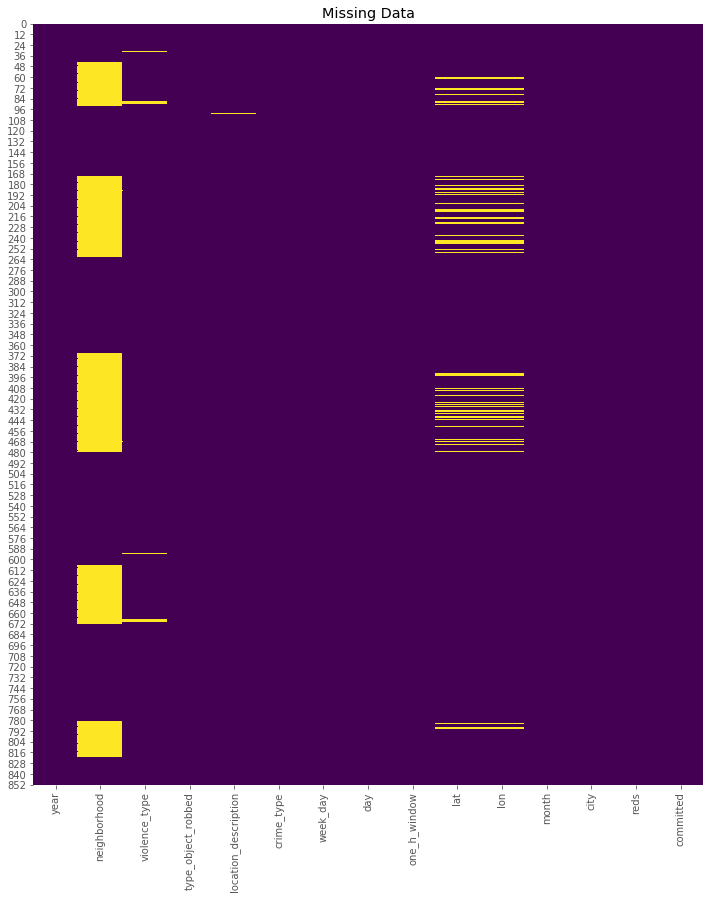

In [11]:
plt.figure(figsize=(12,14))
sns.heatmap(registers.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data')

In [12]:
# Location description
pd.value_counts(registers.location_description)[:10]

VIA DE ACESSO PUBLICA                              429
POSTO DE COMBUSTIVEL                               118
BAR / LANCHONETE / RESTAURANTE / SIMILAR            68
OUTROS - ESTABELECIMENTOS COMERCIAIS / SERVICOS     34
CASA                                                33
MERCEARIA / SACOLAO / SUPERMERCADO                  28
CONFEITARIA / PADARIA / PANIFICADORA                26
LOJA DIVERSA                                        17
SITIO                                               15
BOATE / CASA DE SHOW / SIMILAR                      11
Name: location_description, dtype: int64

In [13]:
100*pd.value_counts(registers.location_description)[:10]/pd.value_counts(registers.location_description).sum()

VIA DE ACESSO PUBLICA                              49.883721
POSTO DE COMBUSTIVEL                               13.720930
BAR / LANCHONETE / RESTAURANTE / SIMILAR            7.906977
OUTROS - ESTABELECIMENTOS COMERCIAIS / SERVICOS     3.953488
CASA                                                3.837209
MERCEARIA / SACOLAO / SUPERMERCADO                  3.255814
CONFEITARIA / PADARIA / PANIFICADORA                3.023256
LOJA DIVERSA                                        1.976744
SITIO                                               1.744186
BOATE / CASA DE SHOW / SIMILAR                      1.279070
Name: location_description, dtype: float64

In [14]:
# Means used to commit the crime
pd.value_counts(registers.violence_type)[:10]

ARMAS DE FOGO                                                    376
INSTRUMENTO CONTUNDENTE / CORTANTE / PERFURANTE (ARMA BRANCA)    184
AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS                       94
AMEACA                                                            87
OUTROS MEIOS (DESCREVER EM CAMPO ESPECIFICO)                      83
SIMULACRO DE ARMA DE FOGO                                         27
EMBOSCADA (INCLUI SAIDINHA DE BANCO)                               2
Name: violence_type, dtype: int64

In [15]:
pd.value_counts(registers.violence_type)[:10]*100/pd.value_counts(registers.violence_type)[:10].sum()

ARMAS DE FOGO                                                    44.079719
INSTRUMENTO CONTUNDENTE / CORTANTE / PERFURANTE (ARMA BRANCA)    21.570926
AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS                      11.019930
AMEACA                                                           10.199297
OUTROS MEIOS (DESCREVER EM CAMPO ESPECIFICO)                      9.730363
SIMULACRO DE ARMA DE FOGO                                         3.165299
EMBOSCADA (INCLUI SAIDINHA DE BANCO)                              0.234467
Name: violence_type, dtype: float64

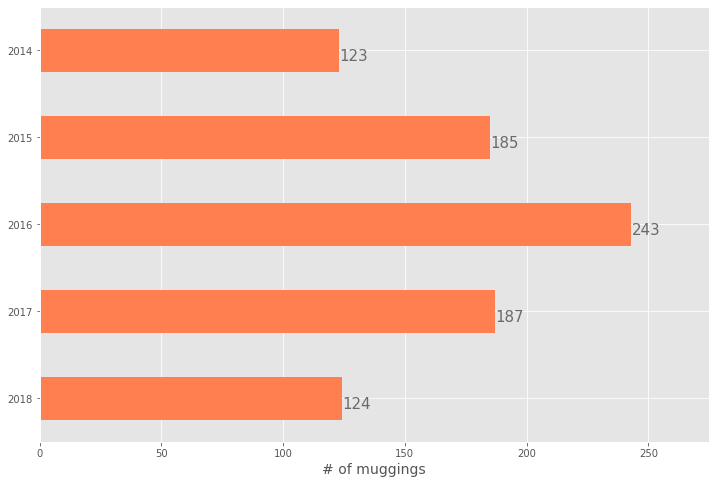

In [16]:
# Crimes per year
ax = registers.year.value_counts().sort_index(ascending=True).plot(kind='barh', 
                                                               figsize=((12,8)),
                                                               color='coral')
ax.set_alpha(0.8)
#plt.title('Robberies per year in Lavras (2014-2018)', fontsize=18)
plt.xlabel('# of muggings', fontsize=14)
plt.xlim(0,275)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    #print(totals)
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.37, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

In [17]:
one_h_replacement_dict = {   'De 00:00 as 00:59': '00:00 - 00:59',
                             'De 01:00 as 01:59': '01:00 - 01:59',
                             'De 02:00 as 02:59': '02:00 - 02:59',
                             'De 03:00 as 03:59': '03:00 - 03:59',
                             'De 04:00 as 04:59': '04:00 - 04:59',
                             'De 05:00 as 05:59': '05:00 - 05:59',
                             'De 06:00 as 06:59': '06:00 - 06:59',
                             'De 07:00 as 07:59': '07:00 - 07:59',
                             'De 08:00 as 08:59': '08:00 - 08:59',
                             'De 09:00 as 09:59': '09:00 - 09:59',
                             'De 10:00 as 10:59': '10:00 - 10:59',
                             'De 11:00 as 11:59': '11:00 - 11:59',
                             'De 12:00 as 12:59': '12:00 - 12:59',
                             'De 13:00 as 13:59': '13:00 - 13:59',
                             'De 14:00 as 14:59': '14:00 - 14:59',
                             'De 15:00 as 15:59': '15:00 - 15:59',
                             'De 16:00 as 16:59': '16:00 - 16:59',
                             'De 17:00 as 17:59': '17:00 - 17:59',
                             'De 18:00 as 18:59': '18:00 - 18:59',
                             'De 19:00 as 19:59': '19:00 - 19:59',
                             'De 20:00 as 20:59': '20:00 - 20:59',
                             'De 21:00 as 21:59': '21:00 - 21:59',
                             'De 22:00 as 22:59': '22:00 - 22:59',
                             'De 23:00 as 23:59': '23:00 - 23:59'}

In [18]:
registers.one_h_window.replace(one_h_replacement_dict, inplace=True)
#registers.one_h_window

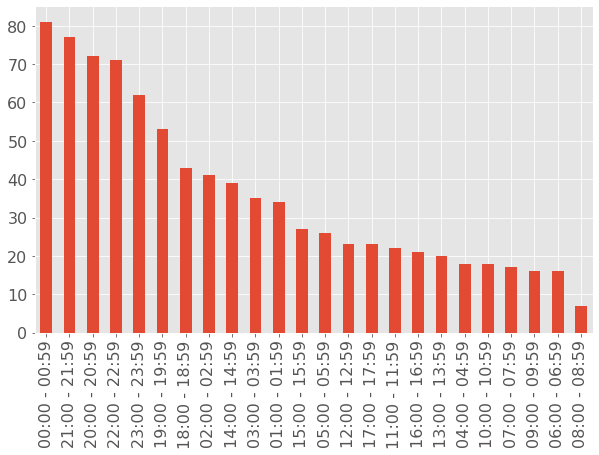

In [41]:
#plt.rcParams.update({'font.size': 16})
plt.tick_params(labelsize=16)
registers.one_h_window.value_counts().plot(kind='bar', figsize=((10,6)))

Text(0, 0.5, '# of muggings')

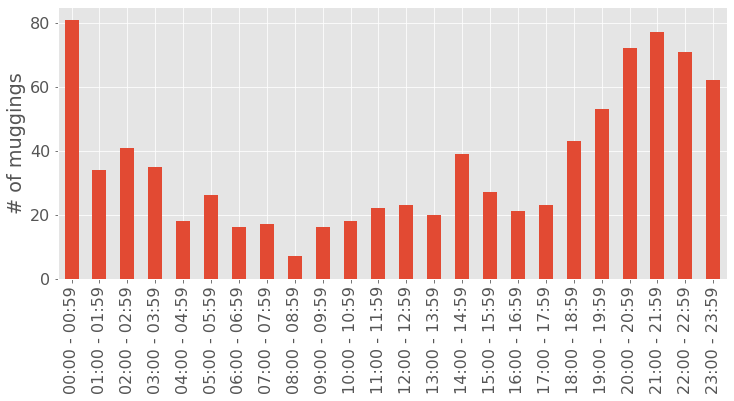

In [28]:
night_times = ['18:00 - 18:59', 
               '19:00 - 19:59', 
               '20:00 - 20:59', 
               '21:00 - 21:59',
               '22:00 - 22:59', 
               '23:00 - 23:59', 
               '00:00 - 00:59', 
               '01:00 - 01:59', 
               '02:00 - 02:59', 
               '03:00 - 03:59', 
               '04:00 - 04:59', 
               '05:00 - 05:59'
              ]
day_times = ['06:00 - 06:59', 
             '07:00 - 07:59', 
             '08:00 - 08:59',
             '09:00 - 09:59', 
             '10:00 - 10:59', 
             '11:00 - 11:59',
             '12:00 - 12:59', 
             '13:00 - 13:59', 
             '14:00 - 14:59', 
             '15:00 - 15:59',
             '16:00 - 16:59', 
             '17:00 - 17:59'
            ]

ax = registers.one_h_window.value_counts().sort_index().plot(kind='bar', figsize=((12,5)))
#ax.set_xlabel('Time of the day')
ax.set_ylabel('# of muggings')

In [29]:
print('Total of crimes committed in day time: \t\t', len(registers[registers.one_h_window.isin(day_times)]))
print('Total of crimes committed in night time: \t', len(registers[registers.one_h_window.isin(night_times)]))

Total of crimes committed in day time: 		 249
Total of crimes committed in night time: 	 613


In [30]:
times_crimes = registers.one_h_window.value_counts().sort_index().reset_index(drop=True)

In [31]:
times_crimes.mean()

35.916666666666664

In [32]:
times_crimes.std()

21.993905611736427

In [33]:
times_crimes.median()

26.5

In [34]:
times_crimes_window = times_crimes.append(times_crimes)
times_crimes_window = times_crimes_window.rolling(window=6).sum()[5:-19]
times_crimes_window

5     235.0
6     170.0
7     153.0
8     119.0
9     100.0
10    100.0
11     96.0
12    103.0
13    106.0
14    138.0
15    149.0
16    152.0
17    153.0
18    173.0
19    206.0
20    239.0
21    289.0
22    339.0
23    378.0
0     416.0
1     397.0
2     366.0
3     324.0
4     271.0
Name: one_h_window, dtype: float64

In [35]:
tc_window_df = pd.DataFrame(times_crimes_window).sort_index()

In [36]:
# When the cummulative sum of crimes exceeds 40% of the total
tc_window_df['hot_times'] = tc_window_df.one_h_window > len(set(registers.reds))*0.4

In [37]:
tc_window_df[tc_window_df.hot_times]

,one_h_window,hot_times
0,416.0,True
1,397.0,True
2,366.0,True
23,378.0,True


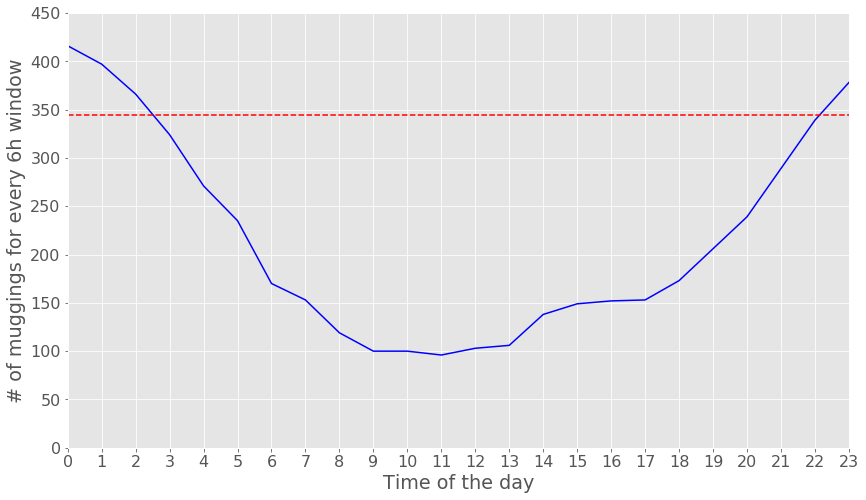

In [38]:
ax = tc_window_df.plot(figsize=((14,8)), color='b', legend=False)
ax.set_ylim(0,450)
ax.set_xlabel('Time of the day')
ax.set_ylabel('# of muggings for every 6h window')
ax.set_xticks(np.arange(0, 24, 1))

# Line dividing 40% of the cases
hline = len(set(registers.reds))*0.4
ax.axhline(y=hline, color='r', linestyle='--')

### Cleaning the registers data

In [29]:
registers.dropna(axis=0, subset=['lat', 'lon'], inplace=True)
len(registers)

803

Text(0.5, 1, 'Missing Data')

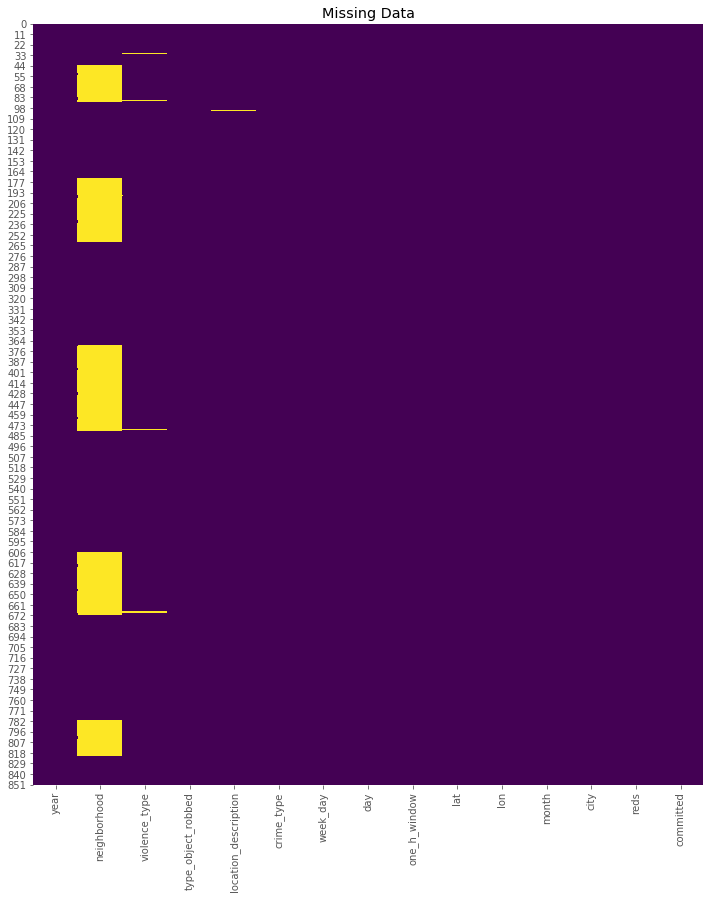

In [30]:
plt.figure(figsize=(12,14))
sns.heatmap(registers.isnull(), cbar = False, cmap = 'viridis')
plt.title('Missing Data')

[121]
[121, 187]
[121, 187, 221]
[121, 187, 221, 161]
[121, 187, 221, 161, 113]


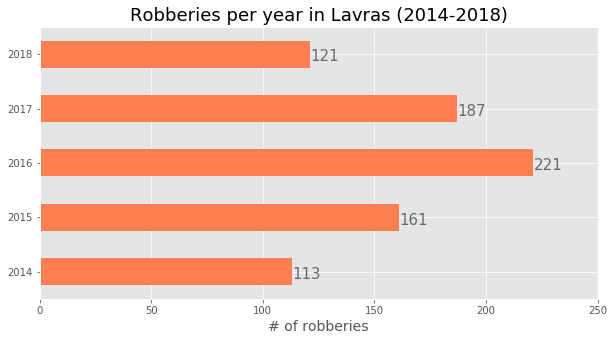

In [31]:
# Crimes per year
ax = registers.year.value_counts().sort_index(ascending=False).plot(kind='barh', 
                                                               figsize=((10,5)),
                                                               color='coral')
ax.set_alpha(0.8)
plt.title('Robberies per year in Lavras (2014-2018)', fontsize=18)
plt.xlabel('# of robberies', fontsize=14)
plt.xlim(0,250)
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())
    print(totals)
    
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, \
            str(round((i.get_width()), 2)), fontsize=15,
color='dimgrey')
# invert for largest on top 
ax.invert_yaxis()

In [32]:
# Location description
pd.value_counts(registers.location_description)[:10]

VIA DE ACESSO PUBLICA                              407
POSTO DE COMBUSTIVEL                               113
BAR / LANCHONETE / RESTAURANTE / SIMILAR            62
CASA                                                29
OUTROS - ESTABELECIMENTOS COMERCIAIS / SERVICOS     29
MERCEARIA / SACOLAO / SUPERMERCADO                  27
CONFEITARIA / PADARIA / PANIFICADORA                24
LOJA DIVERSA                                        16
SITIO                                               12
BOATE / CASA DE SHOW / SIMILAR                      11
Name: location_description, dtype: int64

In [33]:
# Means used to commit the crime
pd.value_counts(registers.violence_type)[:10]

ARMAS DE FOGO                                                    342
INSTRUMENTO CONTUNDENTE / CORTANTE / PERFURANTE (ARMA BRANCA)    177
AGRESSAO FISICA SEM EMPREGO DE INSTRUMENTOS                       91
AMEACA                                                            81
OUTROS MEIOS (DESCREVER EM CAMPO ESPECIFICO)                      79
SIMULACRO DE ARMA DE FOGO                                         25
EMBOSCADA (INCLUI SAIDINHA DE BANCO)                               1
Name: violence_type, dtype: int64

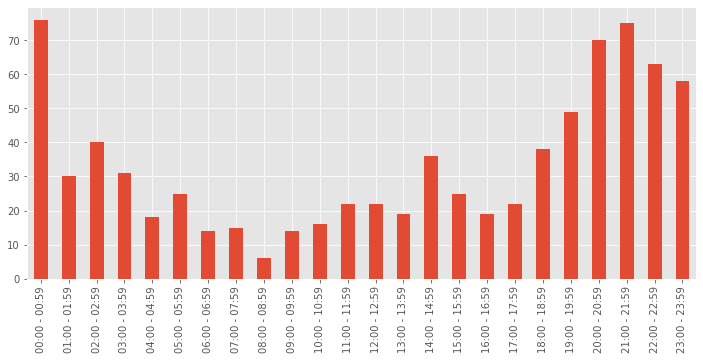

In [34]:
registers.one_h_window.value_counts().sort_index().plot(kind='bar', figsize=((12,5)))

In [35]:
times_crimes = registers.one_h_window.value_counts().sort_index().reset_index(drop=True)
times_crimes_window = times_crimes.append(times_crimes)
times_crimes_window = times_crimes_window.rolling(window=6).sum()[5:-19]
times_crimes_window

5     220.0
6     158.0
7     143.0
8     109.0
9      92.0
10     90.0
11     87.0
12     95.0
13     99.0
14    129.0
15    140.0
16    143.0
17    143.0
18    159.0
19    189.0
20    223.0
21    273.0
22    317.0
23    353.0
0     391.0
1     372.0
2     342.0
3     298.0
4     253.0
Name: one_h_window, dtype: float64

In [36]:
tc_window_df = pd.DataFrame(times_crimes_window).sort_index()
# When the cummulative sum of crimes exceeds 40% of the total
tc_window_df['hot_times'] = tc_window_df.one_h_window > len(set(registers.reds))*0.4

In [37]:
tc_window_df[tc_window_df.hot_times]

,one_h_window,hot_times
0,391.0,True
1,372.0,True
2,342.0,True
23,353.0,True


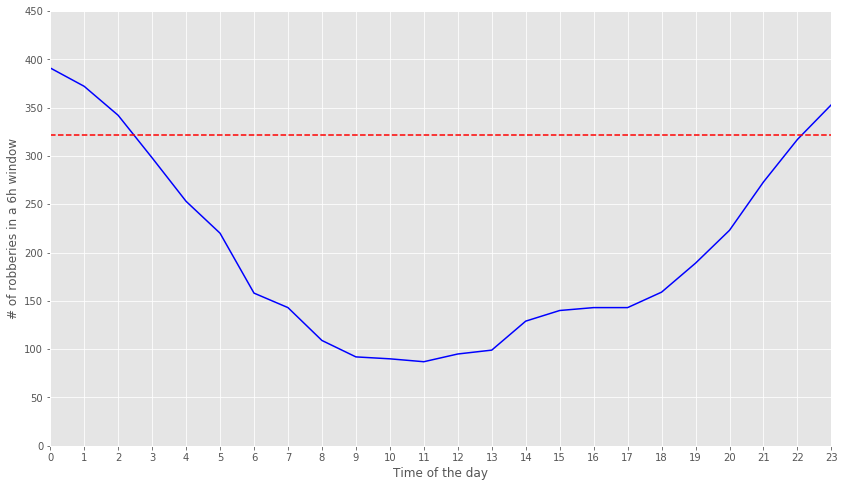

In [38]:
ax = tc_window_df.plot(figsize=((14,8)), color='b', legend=False)
ax.set_ylim(0,450)
ax.set_xlabel('Time of the day')
ax.set_ylabel('# of robberies in a 6h window')
ax.set_xticks(np.arange(0, 24, 1))

# Line dividing 40% of the cases
hline = len(set(registers.reds))*0.4
ax.axhline(y=hline, color='r', linestyle='--')